In [2]:
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
import torchvision

In [8]:
torch.__version__

'1.3.1'

In [7]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [12]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [20]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [21]:
example_data.shape

torch.Size([1000, 1, 28, 28])

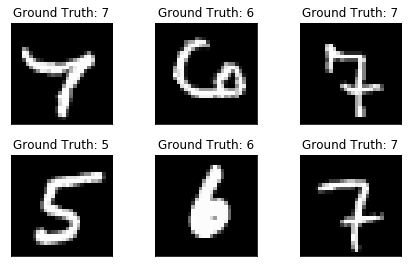

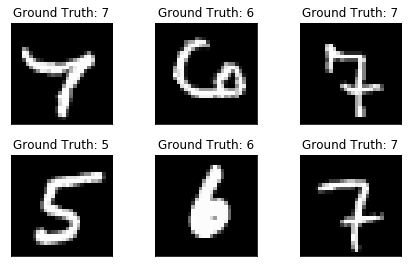

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

fig

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [46]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [47]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []

In [48]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), './Results/model.pth')
            torch.save(optimizer.state_dict(), './Results/optimizer.pth')

In [49]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
            test_counter.append(
                (batch_idx*1000) + ((epoch-1)*len(test_loader.dataset)))
            test_loss /= len(test_loader.dataset)
            test_losses.append(test_loss)
  
            print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                        test_loss, correct, len(test_loader.dataset),
                                100. * correct / len(test_loader.dataset)))

In [50]:
test()

for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 0.2311, Accuracy: 108/10000 (1%)


Test set: Avg. loss: 0.2308, Accuracy: 244/10000 (2%)


Test set: Avg. loss: 0.2310, Accuracy: 361/10000 (4%)


Test set: Avg. loss: 0.2313, Accuracy: 491/10000 (5%)


Test set: Avg. loss: 0.2311, Accuracy: 601/10000 (6%)


Test set: Avg. loss: 0.2311, Accuracy: 724/10000 (7%)


Test set: Avg. loss: 0.2313, Accuracy: 834/10000 (8%)


Test set: Avg. loss: 0.2315, Accuracy: 947/10000 (9%)


Test set: Avg. loss: 0.2308, Accuracy: 1073/10000 (11%)


Test set: Avg. loss: 0.2314, Accuracy: 1184/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.322131
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.271585
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.270850
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.267543
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.246443
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.214788
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.171351
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.070181
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.053661
Train Ep

Train Epoch: 2 [31360/60000 (52%)]	Loss: 0.395288
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.336580
Train Epoch: 2 [32640/60000 (54%)]	Loss: 0.274552
Train Epoch: 2 [33280/60000 (55%)]	Loss: 0.467921
Train Epoch: 2 [33920/60000 (57%)]	Loss: 0.283799
Train Epoch: 2 [34560/60000 (58%)]	Loss: 0.307361
Train Epoch: 2 [35200/60000 (59%)]	Loss: 0.398405
Train Epoch: 2 [35840/60000 (60%)]	Loss: 0.262328
Train Epoch: 2 [36480/60000 (61%)]	Loss: 0.468700
Train Epoch: 2 [37120/60000 (62%)]	Loss: 0.332921
Train Epoch: 2 [37760/60000 (63%)]	Loss: 0.382783
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.276281
Train Epoch: 2 [39040/60000 (65%)]	Loss: 0.371011
Train Epoch: 2 [39680/60000 (66%)]	Loss: 0.255635
Train Epoch: 2 [40320/60000 (67%)]	Loss: 0.251226
Train Epoch: 2 [40960/60000 (68%)]	Loss: 0.407633
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.292830
Train Epoch: 2 [42240/60000 (70%)]	Loss: 0.472276
Train Epoch: 2 [42880/60000 (71%)]	Loss: 0.377086
Train Epoch: 2 [43520/60000 (72%)]	Loss: 0.192732


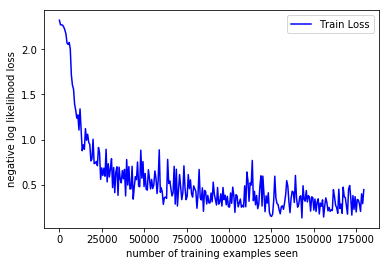

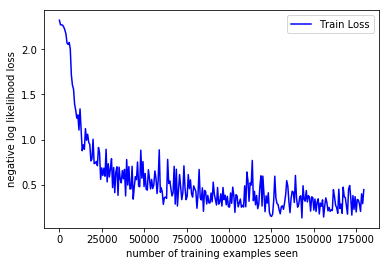

In [54]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
#plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [56]:
with torch.no_grad():
    output = network(example_data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


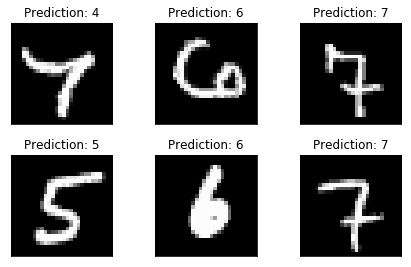

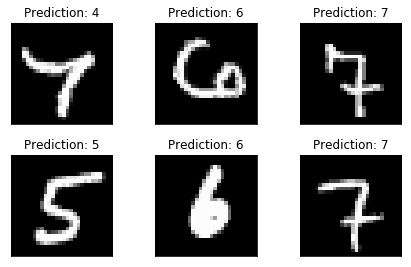

In [57]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
            output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
fig

In [8]:
continued_network = Net()
continued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [10]:
network_state_dict = torch.load('./Results/model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('./Results/optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [60]:
for i in range(4,9):
    test_counter.append(i*len(train_loader.dataset))
    train(i)
    test()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.359674
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.662064
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.272842
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.230651
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.284758
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.407220
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.334194
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.573617
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.292113
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.460464
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.351086
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.287812
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.202899
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.278656
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.227323
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.295862
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.198289
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.210384
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.186624
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.360095
Train Epoch: 4 [12800/60000 (

Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.162249
Train Epoch: 5 [39040/60000 (65%)]	Loss: 0.169565
Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.243809
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.144817
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.087797
Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.231731
Train Epoch: 5 [42240/60000 (70%)]	Loss: 0.191858
Train Epoch: 5 [42880/60000 (71%)]	Loss: 0.306726
Train Epoch: 5 [43520/60000 (72%)]	Loss: 0.223603
Train Epoch: 5 [44160/60000 (74%)]	Loss: 0.172734
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.195234
Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.167384
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.318912
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.180978
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.264414
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.154282
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.109428
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.195045
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.293201
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.375264


Train Epoch: 7 [8960/60000 (15%)]	Loss: 0.119358
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.260073
Train Epoch: 7 [10240/60000 (17%)]	Loss: 0.283036
Train Epoch: 7 [10880/60000 (18%)]	Loss: 0.643558
Train Epoch: 7 [11520/60000 (19%)]	Loss: 0.342251
Train Epoch: 7 [12160/60000 (20%)]	Loss: 0.188695
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.209968
Train Epoch: 7 [13440/60000 (22%)]	Loss: 0.181768
Train Epoch: 7 [14080/60000 (23%)]	Loss: 0.324621
Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.138517
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.265895
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.146344
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.141467
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.202145
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.150798
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.130088
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.223692
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.100665
Train Epoch: 7 [20480/60000 (34%)]	Loss: 0.158310
Train Epoch: 7 [21120/60000 (35%)]	Loss: 0.157602
Tr

Train Epoch: 8 [46720/60000 (78%)]	Loss: 0.167587
Train Epoch: 8 [47360/60000 (79%)]	Loss: 0.143873
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.154572
Train Epoch: 8 [48640/60000 (81%)]	Loss: 0.197345
Train Epoch: 8 [49280/60000 (82%)]	Loss: 0.241209
Train Epoch: 8 [49920/60000 (83%)]	Loss: 0.254044
Train Epoch: 8 [50560/60000 (84%)]	Loss: 0.163622
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.260865
Train Epoch: 8 [51840/60000 (86%)]	Loss: 0.236751
Train Epoch: 8 [52480/60000 (87%)]	Loss: 0.123073
Train Epoch: 8 [53120/60000 (88%)]	Loss: 0.104562
Train Epoch: 8 [53760/60000 (90%)]	Loss: 0.106419
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.247279
Train Epoch: 8 [55040/60000 (92%)]	Loss: 0.213560
Train Epoch: 8 [55680/60000 (93%)]	Loss: 0.408722
Train Epoch: 8 [56320/60000 (94%)]	Loss: 0.092694
Train Epoch: 8 [56960/60000 (95%)]	Loss: 0.378226
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.287782
Train Epoch: 8 [58240/60000 (97%)]	Loss: 0.374243
Train Epoch: 8 [58880/60000 (98%)]	Loss: 0.101999


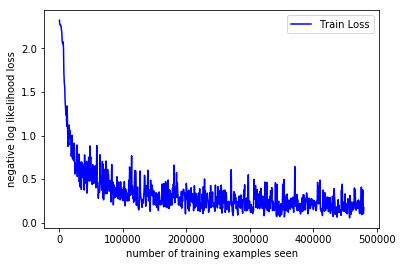

In [63]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.savefig('Train loss vs Training examples')
#plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

In [23]:
with torch.no_grad():
    output = continued_network(example_data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


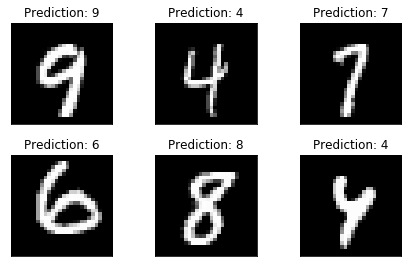

In [24]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
            output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])